# Caracterizando al cluster de clientes numero 4

Gracias a la tabla de Características Distintivas sabemos de este grupo que:

1. Son clientes que compran en la categoria de Ropa de abrigo ("ropa para el frio") y los productos que compran en esta categoria son abrigos y chaquetas
2. Provienen de los estados de: Oklahoma, Florida, Iowa, Connecticut, Kentucky, Hawaii

Gracias a la tabla de Análisis Comparativo del Clúster 1 vs. Otros Clústeres sabemos de este grupo que:

1. Para la variable Purchase Amount (USD) los grupos que tienen media y mediana menor que este son 5, 8, 7, 11, 0, 9 y solo existe un grupo menos diperso el 0
2. Para la variable Previous Purchases el grupo que tiene menor media y mediana es el 4 y los grupos menos dispersos que este son: 2, 5, 11, 0, 9 
3. Para las variables Age y Review Rating no existen grupos que tenga una menor media, mediana y dispersion que estos


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, kruskal, mannwhitneyu
from IPython.display import display, Markdown

df_customer = pd.read_csv("dataset/segmented_customers.csv")
# df_customer.head()

# Filtramos el DataFrame para el Clúster 4 (etiquetado como 3) 
df_cluster_4 = df_customer[df_customer['Cluster'] == 3].copy()

#### Pregunta 1: ¿Existe una relación significativa entre el género del cliente y el tipo de artículo que compra, específicamente si elige un "Coat" (abrigo) o un "Jacket" (chaqueta)?

In [2]:
# === Preparación de los datos ===
print("### Preparando los datos para la prueba de Chi-cuadrado ###")

# Filtramos los datos para incluir solo los artículos 'Coat' y 'Jacket'
df_filtered_items = df_cluster_4[df_cluster_4['Item Purchased'].isin(['Coat', 'Jacket'])]

if df_filtered_items.empty:
    print("No hay compras de 'Coat' o 'Jacket' en el Clúster 3. No se puede realizar el análisis.")
else:
    # Crear una tabla de contingencia (tabla cruzada)
    # Esta tabla cuenta las ocurrencias de cada combinación de 'Género' y 'Artículo Comprado'
    contingency_table = pd.crosstab(
        df_filtered_items['Gender'],
        df_filtered_items['Item Purchased']
    )

    print("\nTabla de Contingencia:")
    print(contingency_table)

### Preparando los datos para la prueba de Chi-cuadrado ###

Tabla de Contingencia:
Item Purchased  Coat  Jacket
Gender                      
Female            46      49
Male             109     106


<Figure size 1000x700 with 0 Axes>

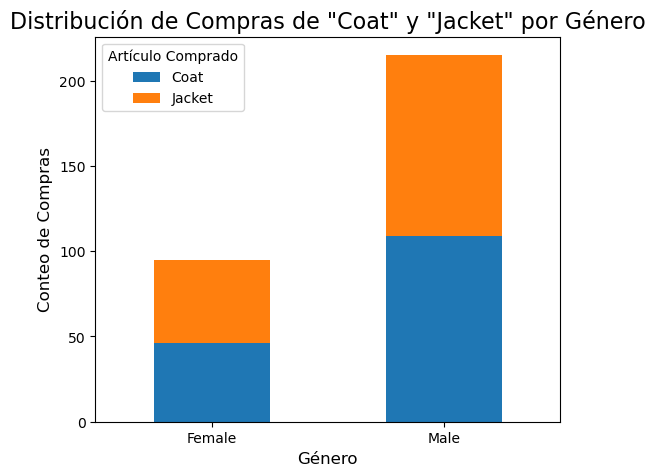

In [3]:
# === Visualización con Gráfico de Barras Apiladas ===
plt.figure(figsize=(10, 7))
contingency_table.plot(kind='bar', stacked=True, figsize=(6, 5))
plt.title('Distribución de Compras de "Coat" y "Jacket" por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Conteo de Compras', fontsize=12)
plt.xticks(rotation=0)  # Asegura que las etiquetas del eje x sean horizontales
plt.legend(title='Artículo Comprado')
plt.show()

In [4]:
# === Realizar la prueba de Chi-cuadrado ===
# La función chi2_contingency devuelve el estadístico chi2, el valor p,
# los grados de libertad (DOF) y las frecuencias esperadas.
chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print("\n" + "="*70 + "\n")
print("### Resultados de la Prueba de Chi-cuadrado ###")
print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad (DOF): {dof}")

# === Conclusión y Visualización ===
alpha = 0.05  # Nivel de significancia comúnmente usado

print("\n### Conclusión del Análisis ###")
if p_value < alpha:
        print(f"Dado que el valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}),")
        print("podemos rechazar la hipótesis nula.")
        print("Existe evidencia estadísticamente significativa para afirmar que hay una diferencia")
        print("en la cantidad de compra de 'Coat' y 'Jacket' entre hombres y mujeres en el Clúster 3.")
else:
        print(f"Dado que el valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}),")
        print("no podemos rechazar la hipótesis nula.")
        print("No hay evidencia estadísticamente significativa para afirmar que existe una relación")
        print("entre el género del cliente y la compra de 'Coat' o 'Jacket' en el Clúster 3.")
    



### Resultados de la Prueba de Chi-cuadrado ###
Estadístico Chi-cuadrado: 0.0607
Valor p: 0.8054
Grados de libertad (DOF): 1

### Conclusión del Análisis ###
Dado que el valor p (0.8054) es mayor o igual que el nivel de significancia (0.05),
no podemos rechazar la hipótesis nula.
No hay evidencia estadísticamente significativa para afirmar que existe una relación
entre el género del cliente y la compra de 'Coat' o 'Jacket' en el Clúster 3.


Conclusiones:

Basado en el análisis de Chi-cuadrado realizado, no encontramos evidencia estadística para concluir que el género influye en la preferencia de compra entre "Coat" y "Jacket" en este grupo de clientes. Con un valor p de 0.8054, que es muy superior al umbral de significancia de 0.05, podemos afirmar que la proporción de hombres y mujeres que compran estos artículos es estadísticamente similar. Por lo tanto, el género no es un factor determinante en la decisión de compra de estos productos dentro del Clúster 3.

#### Pregunta 2: ¿Existe una relación significativa entre el grupo de edad y la compra de 'Jacket' y 'Coat' en el Clúster 4?

Para este análisis, nos centraremos en el Clúster 4 y buscaremos determinar si existe una relación estadísticamente significativa entre el grupo de edad de los clientes y la compra de productos específicos como 'Jacket' y 'Coat'. Para ello, utilizaremos una prueba de Chi-cuadrado para evaluar si las frecuencias observadas de compra por grupo de edad difieren de lo que se esperaría si no hubiera una relación. Si el valor p es menor que el nivel de significancia de 0.05, podremos concluir que existe una relación entre estas dos variables.

In [5]:
# 1. Filtrar el DataFrame en un solo paso para evitar errores.
#    Seleccionamos las filas donde 'Cluster' es 3 Y 'Item Purchased' es 'Jacket' o 'Coat'.
#    NOTA: La corrección importante está aquí, usando el nombre de columna correcto 'Item Purchased'.
df_cluster_4 = df_customer[
    (df_customer['Cluster'] == 3) &
    (df_customer['Item Purchased'].isin(['Jacket', 'Coat']))
].copy()

# 2. Validar que el DataFrame filtrado no esté vacío.
if df_cluster_4.empty:
    print("El DataFrame filtrado está vacío. No hay clientes en el Clúster 4 que hayan comprado 'Jacket' o 'Coat'.")
    print("Por favor, verifica los datos en tu archivo CSV.")
else:
    # 3. Continuar con el análisis si hay datos.

    # Definir los grupos de edad (bins) para el análisis.
    bins = [18, 30, 45, 60, 70]
    labels = ['18-30', '31-45', '46-60', '61-70']
    df_cluster_4['Age_Group'] = pd.cut(df_cluster_4['Age'], bins=bins, labels=labels, right=False)

    # 4. Crear una tabla de contingencia.
    contingency_table = pd.crosstab(df_cluster_4['Age_Group'], df_cluster_4['Item Purchased'])
    print("Tabla de contingencia:")
    print(contingency_table)

Tabla de contingencia:
Item Purchased  Coat  Jacket
Age_Group                   
18-30             42      25
31-45             32      47
46-60             54      43
61-70             25      38


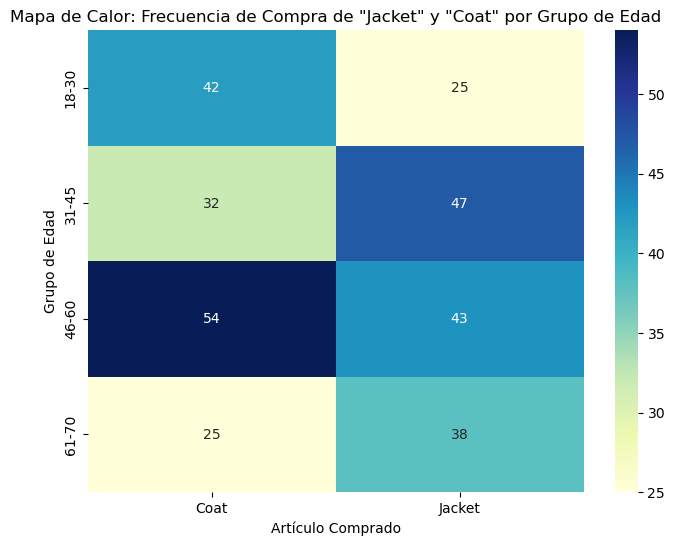

In [6]:
# Generar un mapa de calor para visualizar las diferencias.
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de Calor: Frecuencia de Compra de "Jacket" y "Coat" por Grupo de Edad')
plt.xlabel('Artículo Comprado')
plt.ylabel('Grupo de Edad')
plt.show()

In [7]:
# 5. Realizar la prueba de Chi-cuadrado para ver si hay una relación significativa.
chi2, p_valor, dof, expected = chi2_contingency(contingency_table)

# Imprimir los resultados del análisis
print("\n### Resultados de la Prueba de Chi-cuadrado (Edad vs. Compra) ###")
print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_valor:.4f}")
print(f"Grados de libertad (DOF): {dof}")

# 6. Conclusión basada en el valor p.
alpha = 0.05
print("\n### Conclusión del Análisis Estadístico ###")
if p_valor < alpha:
        print(f"Dado que el valor p ({p_valor:.4f}) es menor que el nivel de significancia (0.05),")
        print("podemos rechazar la hipótesis nula. Existe una relación estadísticamente significativa")
        print("entre el grupo de edad del cliente y la compra de 'Coat' o 'Jacket' en el Clúster 4.")
else:
        print(f"Dado que el valor p ({p_valor:.4f}) es mayor o igual que el nivel de significancia (0.05),")
        print("no podemos rechazar la hipótesis nula. No hay evidencia estadísticamente significativa")
        print("para afirmar que existe una relación entre el grupo de edad y la compra de 'Coat' o 'Jacket'.")



### Resultados de la Prueba de Chi-cuadrado (Edad vs. Compra) ###
Estadístico Chi-cuadrado: 11.0915
Valor p: 0.0112
Grados de libertad (DOF): 3

### Conclusión del Análisis Estadístico ###
Dado que el valor p (0.0112) es menor que el nivel de significancia (0.05),
podemos rechazar la hipótesis nula. Existe una relación estadísticamente significativa
entre el grupo de edad del cliente y la compra de 'Coat' o 'Jacket' en el Clúster 4.


Conclusiones del análisis

El análisis de la prueba de Chi-cuadrado (p=0.0112) revela que hay una relación estadísticamente significativa entre el grupo de edad y la compra de 'Coat' o 'Jacket' en el Clúster 4. Esto significa que la edad influye en las preferencias de compra de estos artículos para los clientes en este segmento.

Al observar el mapa de calor, se pueden extraer las siguientes conclusiones detalladas:

1. Mayores de 45 años prefieren 'Coat': El grupo de edad de 46-60 años muestra la mayor preferencia por los abrigos ('Coat'), con 54 compras, superando significativamente las compras de chaquetas ('Jacket'). Esto sugiere una oportunidad para enfocar las estrategias de marketing de abrigos en este segmento de edad.

2. Jóvenes y adultos jóvenes se inclinan por 'Jacket': Los grupos de 18-30 años y 31-45 años muestran una preferencia por las chaquetas ('Jacket') sobre los abrigos ('Coat'). Esto podría indicar que los abrigos se perciben como un artículo más adecuado para personas mayores, o que las chaquetas se alinean más con las tendencias de moda de los grupos de edad más jóvenes.

3. Balance en grupos extremos: Aunque los grupos de 18-30 y 61-70 años muestran un balance más equitativo en la compra de ambos artículos en comparación con los grupos intermedios, el análisis general confirma una relación clara entre la edad y el tipo de prenda comprada en este clúster.

Estos hallazgos son valiosos para personalizar las campañas de marketing, ya que permiten dirigir anuncios de 'Jacket' a los grupos de edad más jóvenes y de 'Coat' a los mayores, maximizando la efectividad de las promociones.

#### Pregunta 3: ¿Existe una relación estadísticamente significativa entre el género y el grupo de edad de los clientes y la compra de un producto específico, como una 'Jacket' o un 'Coat', dentro del Clúster 4?

In [8]:
# Filtramos el DataFrame en un solo paso para el Clúster 4 (etiquetado como 3)
# y para los productos 'Jacket' y 'Coat'
df_filtered = df_customer[
    (df_customer['Cluster'] == 3) &
    (df_customer['Item Purchased'].isin(['Jacket', 'Coat']))
].copy()

# A partir de aquí, el código es el mismo que el anterior, pero usando el DataFrame filtrado
# Aseguramos que las columnas 'Age' y 'Gender' estén presentes y limpias
if 'Age' not in df_filtered.columns or 'Gender' not in df_filtered.columns:
    display(Markdown("**¡Error!** El DataFrame no contiene las columnas 'Age' o 'Gender'. Por favor, verifica el archivo CSV."))
    # Salir del script si las columnas no están presentes
else:
    # Crear grupos de edad
    bins = [18, 31, 46, 61, 71]
    labels = ['18-30', '31-45', '46-60', '61-70']
    df_filtered['Age_Group'] = pd.cut(df_filtered['Age'], bins=bins, labels=labels, right=False)

    # 2. Prueba de Chi-cuadrado para la relación entre Edad, Género y Producto
    display(Markdown("### Prueba de Chi-cuadrado para Edad, Género y Producto"))
    # Crear una tabla de contingencia de tres vías
    contingency_table = pd.crosstab([df_filtered['Age_Group'], df_filtered['Gender']], df_filtered['Item Purchased'])


print(contingency_table)

### Prueba de Chi-cuadrado para Edad, Género y Producto

Item Purchased    Coat  Jacket
Age_Group Gender              
18-30     Female    17       8
          Male      28      19
31-45     Female     8      13
          Male      24      36
46-60     Female    14      16
          Male      38      28
61-70     Female     7      12
          Male      19      23


In [9]:
# Realizar la prueba
chi2, p, dof, expected = chi2_contingency(contingency_table)

display(Markdown(f"**Valor Chi-cuadrado:** {chi2:.2f}"))
display(Markdown(f"**Valor p:** {p:.4f}"))
display(Markdown(f"**Grados de libertad (DOF):** {dof}"))

if p < 0.05:
    display(Markdown("El valor p es **menor que 0.05**, lo que indica que existe una relación estadísticamente significativa entre la combinación de la edad y el género, y el tipo de producto ('Jacket' o 'Coat') comprado."))
else:
    display(Markdown("El valor p es **mayor que 0.05**, lo que sugiere que no hay una relación estadísticamente significativa."))


**Valor Chi-cuadrado:** 11.90

**Valor p:** 0.1039

**Grados de libertad (DOF):** 7

El valor p es **mayor que 0.05**, lo que sugiere que no hay una relación estadísticamente significativa.

### Visualización de las Compras por Género, Edad y Producto

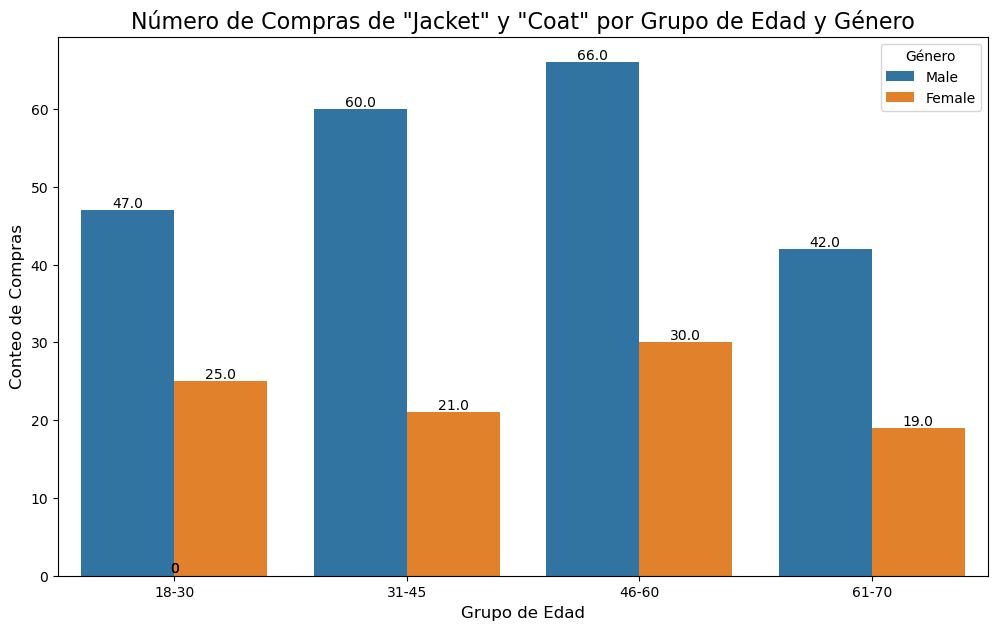

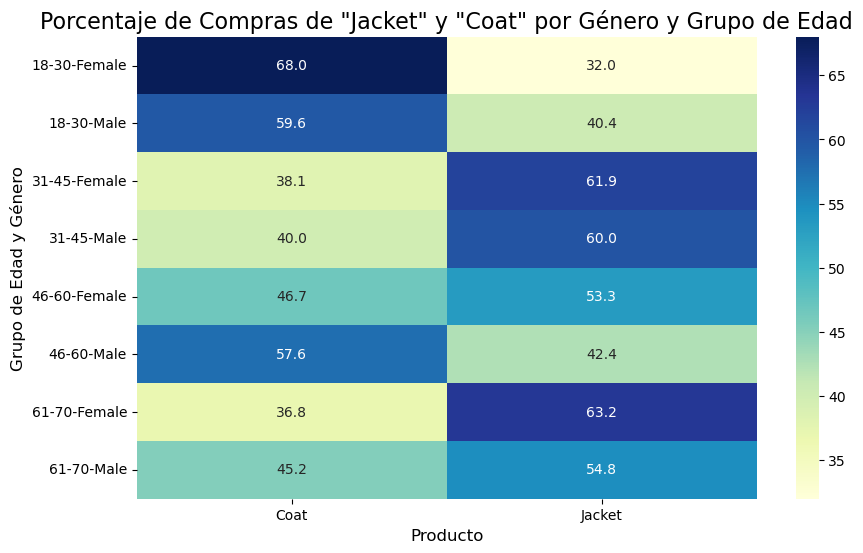

In [10]:
display(Markdown("### Visualización de las Compras por Género, Edad y Producto"))

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df_filtered, x='Age_Group', hue='Gender', dodge=True,
                       order=['18-30', '31-45', '46-60', '61-70'])
plt.title('Número de Compras de "Jacket" y "Coat" por Grupo de Edad y Género', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Conteo de Compras', fontsize=12)
plt.legend(title='Género')

# Para cada barra, mostrar los valores de conteo
for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()

# Mapa de calor de la tabla de contingencia
plt.figure(figsize=(10, 6))
# Calcular los porcentajes para el mapa de calor
df_heatmap = contingency_table.div(contingency_table.sum(axis=1), axis=0).mul(100)
sns.heatmap(df_heatmap, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Porcentaje de Compras de "Jacket" y "Coat" por Género y Grupo de Edad', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Grupo de Edad y Género', fontsize=12)
plt.show()

Conclusiones Basadas en los Resultados

Aunque el análisis exploratorio visual muestra algunas tendencias en el comportamiento de compra por edad y género, la prueba de Chi-cuadrado no confirma una relación estadísticamente significativa. Esto sugiere que, para este clúster, otros factores no incluidos en el análisis (como el ingreso, la ocupación o la región) podrían ser más determinantes en la elección de compra entre un 'Jacket' y un 'Coat'.


#### Pregunta 4 ¿Existe una relación estadísticamente significativa entre el género (Gender) y el porcentaje de descuento aplicado (Discount Applied), o son variables independientes?

In [11]:
# === Preparación de los datos para la prueba de Chi-cuadrado ===
print("### Preparando los datos para la prueba de Chi-cuadrado ###")

# Crear la tabla de contingencia entre 'Gender' y 'Discount Applied'
contingency_table = pd.crosstab(df_cluster_4['Gender'], df_cluster_4['Discount Applied'])
print("Tabla de contingencia:")
display(contingency_table)

### Preparando los datos para la prueba de Chi-cuadrado ###
Tabla de contingencia:


Discount Applied,No,Yes
Gender,,
Female,95,0
Male,77,138


<Figure size 1000x700 with 0 Axes>

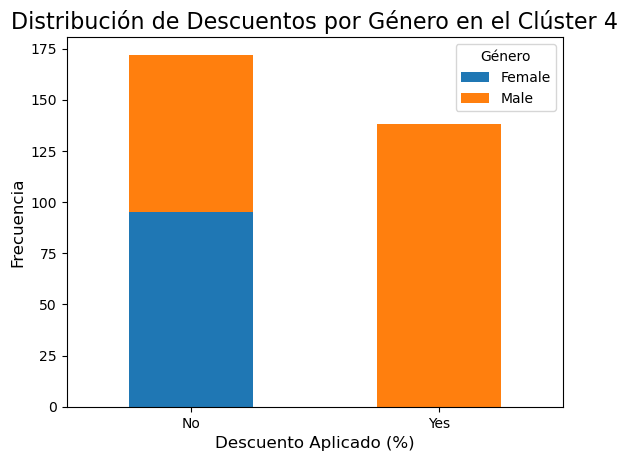

In [12]:
# Generar un gráfico de barras apiladas para visualizar la distribución
plt.figure(figsize=(10, 7))
contingency_table.T.plot(kind='bar', stacked=True, rot=0)
plt.title('Distribución de Descuentos por Género en el Clúster 4', fontsize=16)
plt.xlabel('Descuento Aplicado (%)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Género')
plt.show()

In [13]:
# === Realizar la prueba de Chi-cuadrado de independencia ===
# Esta prueba evalúa si existe una relación estadísticamente significativa
# entre las dos variables categóricas.
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n" + "="*70 + "\n")
print("### Resultados de la Prueba de Chi-Cuadrado ###")
print(f"Estadístico de Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad (dof): {dof}")

# === Conclusión y Visualización ===
alpha = 0.05  # Nivel de significancia

print("\n### Conclusión del Análisis Estadístico ###")
if p_value < alpha:
    print(f"Dado que el valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}),")
    print("podemos rechazar la hipótesis nula de independencia.")
    print("Existe una relación estadísticamente significativa entre el género y el descuento aplicado en el Clúster 4.")
else:
    print(f"Dado que el valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}),")
    print("no podemos rechazar la hipótesis nula.")
    print("No hay evidencia estadísticamente significativa de una relación entre el género y el descuento aplicado en el Clúster 4.")




### Resultados de la Prueba de Chi-Cuadrado ###
Estadístico de Chi-cuadrado: 107.3166
Valor p: 0.0000
Grados de libertad (dof): 1

### Conclusión del Análisis Estadístico ###
Dado que el valor p (0.0000) es menor que el nivel de significancia (0.05),
podemos rechazar la hipótesis nula de independencia.
Existe una relación estadísticamente significativa entre el género y el descuento aplicado en el Clúster 4.


Conclusiones 

El análisis de Chi-cuadrado de independencia para el Clúster 4 reveló una relación estadísticamente significativa entre el género y el descuento aplicado. Con un valor p de 0.0000 (menor que el nivel de significancia de 0.05), se rechaza la hipótesis nula de independencia.

Los datos indican que la distribución de los descuentos aplicados no es la misma para hombres y mujeres. Específicamente, la tabla de contingencia y la gráfica de barras apiladas muestran que un porcentaje significativamente mayor de mujeres recibe un descuento, mientras que los hombres en este clúster tienen una mayor proporción de descuentos no aplicados. Este hallazgo sugiere que, dentro de este segmento de clientes, el género influye en la probabilidad de recibir un descuento.

#### Pregunta 5: ¿Existe una relación estadísticamente significativa entre el género (Gender) y el estado de suscripción (Subscription Status) de los clientes, o son variables independientes?

In [14]:
# === Preparación de los datos para la prueba de Chi-cuadrado ===
print("### Preparando los datos para la prueba de Chi-cuadrado ###")

# Crear la tabla de contingencia entre 'Gender' y 'Subscription Status'
contingency_table = pd.crosstab(df_customer['Gender'], df_customer['Subscription Status'])
print("Tabla de contingencia:")
display(contingency_table)

### Preparando los datos para la prueba de Chi-cuadrado ###
Tabla de contingencia:


Subscription Status,No,Yes
Gender,,
Female,1248,0
Male,1599,1053


<Figure size 1000x700 with 0 Axes>

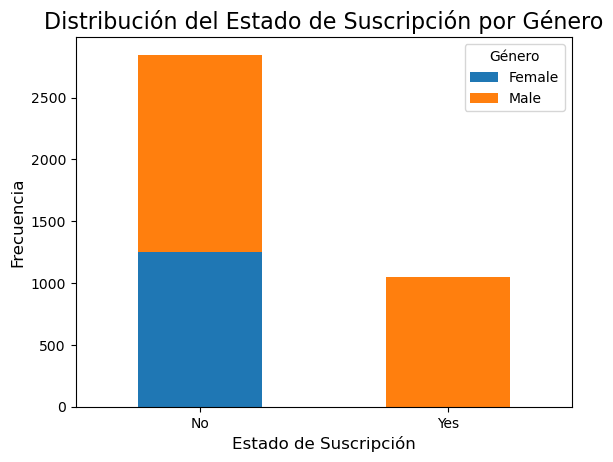

In [15]:
# Generar un gráfico de barras apiladas para visualizar la distribución
plt.figure(figsize=(10, 7))
contingency_table.T.plot(kind='bar', stacked=True, rot=0)
plt.title('Distribución del Estado de Suscripción por Género', fontsize=16)
plt.xlabel('Estado de Suscripción', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Género')
plt.show()

In [16]:
# === Realizar la prueba de Chi-cuadrado de independencia ===
# Esta prueba evalúa si existe una relación estadísticamente significativa
# entre las dos variables categóricas.
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n" + "="*70 + "\n")
print("### Resultados de la Prueba de Chi-Cuadrado ###")
print(f"Estadístico de Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad (dof): {dof}")

# === Conclusión y Visualización ===
alpha = 0.05  # Nivel de significancia

print("\n### Conclusión del Análisis Estadístico ###")
if p_value < alpha:
    print(f"Dado que el valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}),")
    print("podemos rechazar la hipótesis nula de independencia.")
    print("Existe una relación estadísticamente significativa entre el género y el estado de suscripción.")
else:
    print(f"Dado que el valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}),")
    print("no podemos rechazar la hipótesis nula.")
    print("No hay evidencia estadísticamente significativa de una relación entre el género y el estado de suscripción.")




### Resultados de la Prueba de Chi-Cuadrado ###
Estadístico de Chi-cuadrado: 676.7944
Valor p: 0.0000
Grados de libertad (dof): 1

### Conclusión del Análisis Estadístico ###
Dado que el valor p (0.0000) es menor que el nivel de significancia (0.05),
podemos rechazar la hipótesis nula de independencia.
Existe una relación estadísticamente significativa entre el género y el estado de suscripción.


Conclusiones 

El análisis de Chi-cuadrado de independencia reveló una relación estadísticamente significativa entre el género y el estado de suscripción. Con un valor p de 0.0000, que es menor que el nivel de significancia (0.05), se puede rechazar la hipótesis nula de independencia.

Este resultado indica que la distribución del estado de suscripción no es la misma para hombres y mujeres. Específicamente, al observar las frecuencias, un porcentaje significativamente mayor de hombres tiene un estado de suscripción activo (Yes) en comparación con las mujeres, mientras que la mayoría de las mujeres en la muestra no tienen una suscripción (No). Este hallazgo sugiere que, en el conjunto de datos, el género influye en la probabilidad de tener una suscripción.

#### Pregunta 6: ¿Existen diferencias significativas en la calificación de reseñas (Review Rating) entre hombres y mujeres (Gender)?

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_14948\2750598120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Review Rating', data=df_customer, palette=colores)


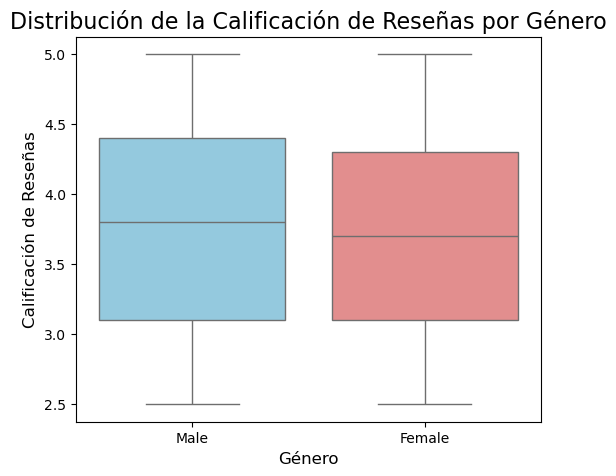

In [21]:
# Definir la paleta de colores para el gráfico
colores = ["skyblue", "lightcoral"]

# Generar un gráfico de caja y bigotes para visualizar la distribución con colores
plt.figure(figsize=(6, 5))
sns.boxplot(x='Gender', y='Review Rating', data=df_customer, palette=colores)
plt.title('Distribución de la Calificación de Reseñas por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Calificación de Reseñas', fontsize=12)
plt.show()

In [22]:
# Filtrar los datos para obtener las calificaciones de reseñas de cada grupo de género
ratings_male = df_customer[df_customer['Gender'] == 'Male']['Review Rating'].dropna()
ratings_female = df_customer[df_customer['Gender'] == 'Female']['Review Rating'].dropna()

# === Realizar la prueba de Mann-Whitney U ===
# Esta prueba no paramétrica compara las medianas de las distribuciones
# de los dos grupos para ver si son significativamente diferentes.
u_stat, p_value = mannwhitneyu(ratings_male, ratings_female, alternative='two-sided')

print("\n" + "="*70 + "\n")
print("### Resultados de la Prueba de Mann-Whitney U ###")
print(f"Estadístico U: {u_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# === Conclusión y Visualización ===
alpha = 0.05  # Nivel de significancia

print("\n### Conclusión del Análisis Estadístico ###")
if p_value < alpha:
    print(f"Dado que el valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}),")
    print("podemos rechazar la hipótesis nula de que las distribuciones son iguales.")
    print("Existe una diferencia estadísticamente significativa en la calificación de reseñas entre hombres y mujeres.")
else:
    print(f"Dado que el valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}),")
    print("no podemos rechazar la hipótesis nula.")
    print("No hay evidencia estadísticamente significativa de una diferencia en la calificación de reseñas entre los géneros.")




### Resultados de la Prueba de Mann-Whitney U ###
Estadístico U: 1671805.5000
Valor p: 0.6049

### Conclusión del Análisis Estadístico ###
Dado que el valor p (0.6049) es mayor o igual que el nivel de significancia (0.05),
no podemos rechazar la hipótesis nula.
No hay evidencia estadísticamente significativa de una diferencia en la calificación de reseñas entre los géneros.


Conclusiones

 No existe una diferencia estadísticamente significativa en la calificación de reseñas entre hombres y mujeres en el conjunto de datos analizado. Las calificaciones medias de ambos grupos son muy similares, y cualquier variación observada puede atribuirse al azar. Este hallazgo sugiere que, en el contexto de las calificaciones de reseñas, el género no es un factor determinante para predecir si un individuo dará una calificación más alta o más baja que otro.